### Roles

1. Expertos en el tema     (que queremos encontrar, y si se logra)               
2. Cientificos de datos (modelado)
3. Ingeniero de datos (ETL)
4. Ingeniero de software (Visualizacion) proximamente
5. Equipo devops  (CI/CD)    proximamente
6. Gestor de riesgo (transparencia,justicia,igualdad,gobernanza,seguridad) 
7. Architecture ML (plantear la qrquitectura de ML) 


In [1]:
import sys, os
import pandas as pd
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
from turkish_music_emotion.dataset import DataHandler
from turkish_music_emotion.plots import PlotHandler
from turkish_music_emotion.eda import ClassPlotter, MissingValueAnalyzer 
from turkish_music_emotion.eda import CorrelationHeatmap
from turkish_music_emotion.eda import LabelEncoderWrapper

2024-10-10 19:36:03.049 | INFO     | turkish_music_emotion.config:<module>:11 - PROJ_ROOT path is: C:\ITESM-MNA\mlops_team_20


In [2]:
dh = DataHandler()

In [3]:
df = dh.load_raw_data()

2024-10-10 19:36:09.281 | INFO     | turkish_music_emotion.dataset:load_raw_data:14 - Loading raw data from C:\ITESM-MNA\mlops_team_20\data\raw\Acoustic Features.csv
2024-10-10 19:36:09.292 | SUCCESS  | turkish_music_emotion.dataset:load_raw_data:16 - Raw data loaded successfully.


In [4]:
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [5]:
ph_df = PlotHandler(df)

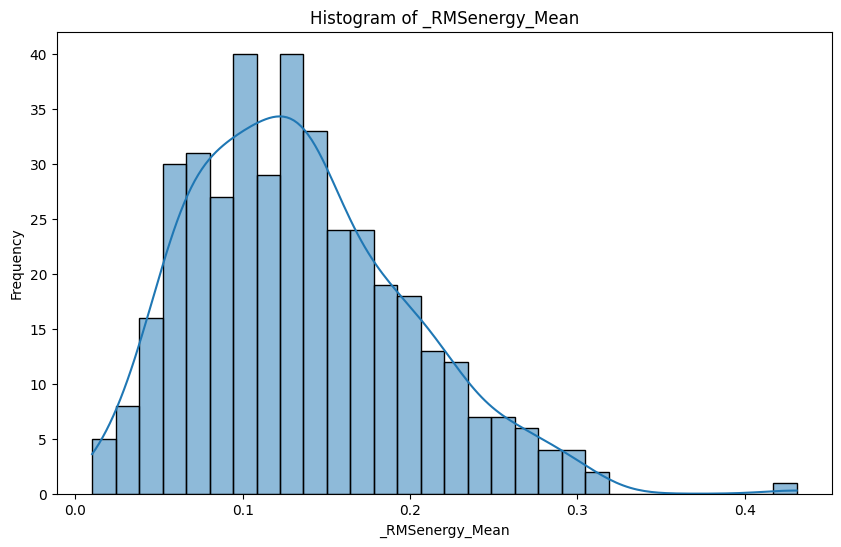

In [6]:
ph_df.plot_hist(column='_RMSenergy_Mean', save=False)
# ph_df.plot_hist(column='_RMSenergy_Mean', save=True, filename='hist_RMSenergy_Mean.png')

In [7]:
# dh.save_processed_data("Acoustic_Features_Processed.csv")

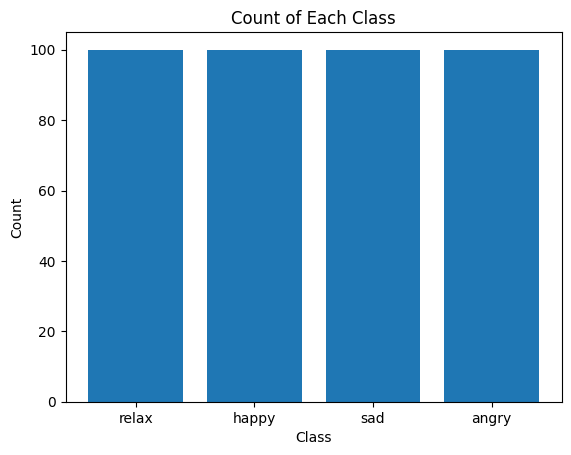

In [8]:
# Graficar para cada clase de emociones
plotter = ClassPlotter(df, 'Class')  
plotter.count_classes()                
plotter.plot_classes()                 

In [9]:
# Evaluar datos faltantes
analyzer = MissingValueAnalyzer(df)  
analyzer.display_missing_columns()

No hay columnas con valores faltantes.


In [10]:
# codificación de etiquetas (label encoding) para columnas categóricas
encoder = LabelEncoderWrapper(df)     
encoder.encode_column('Class')          
encoded_data = encoder.get_encoded_data()  

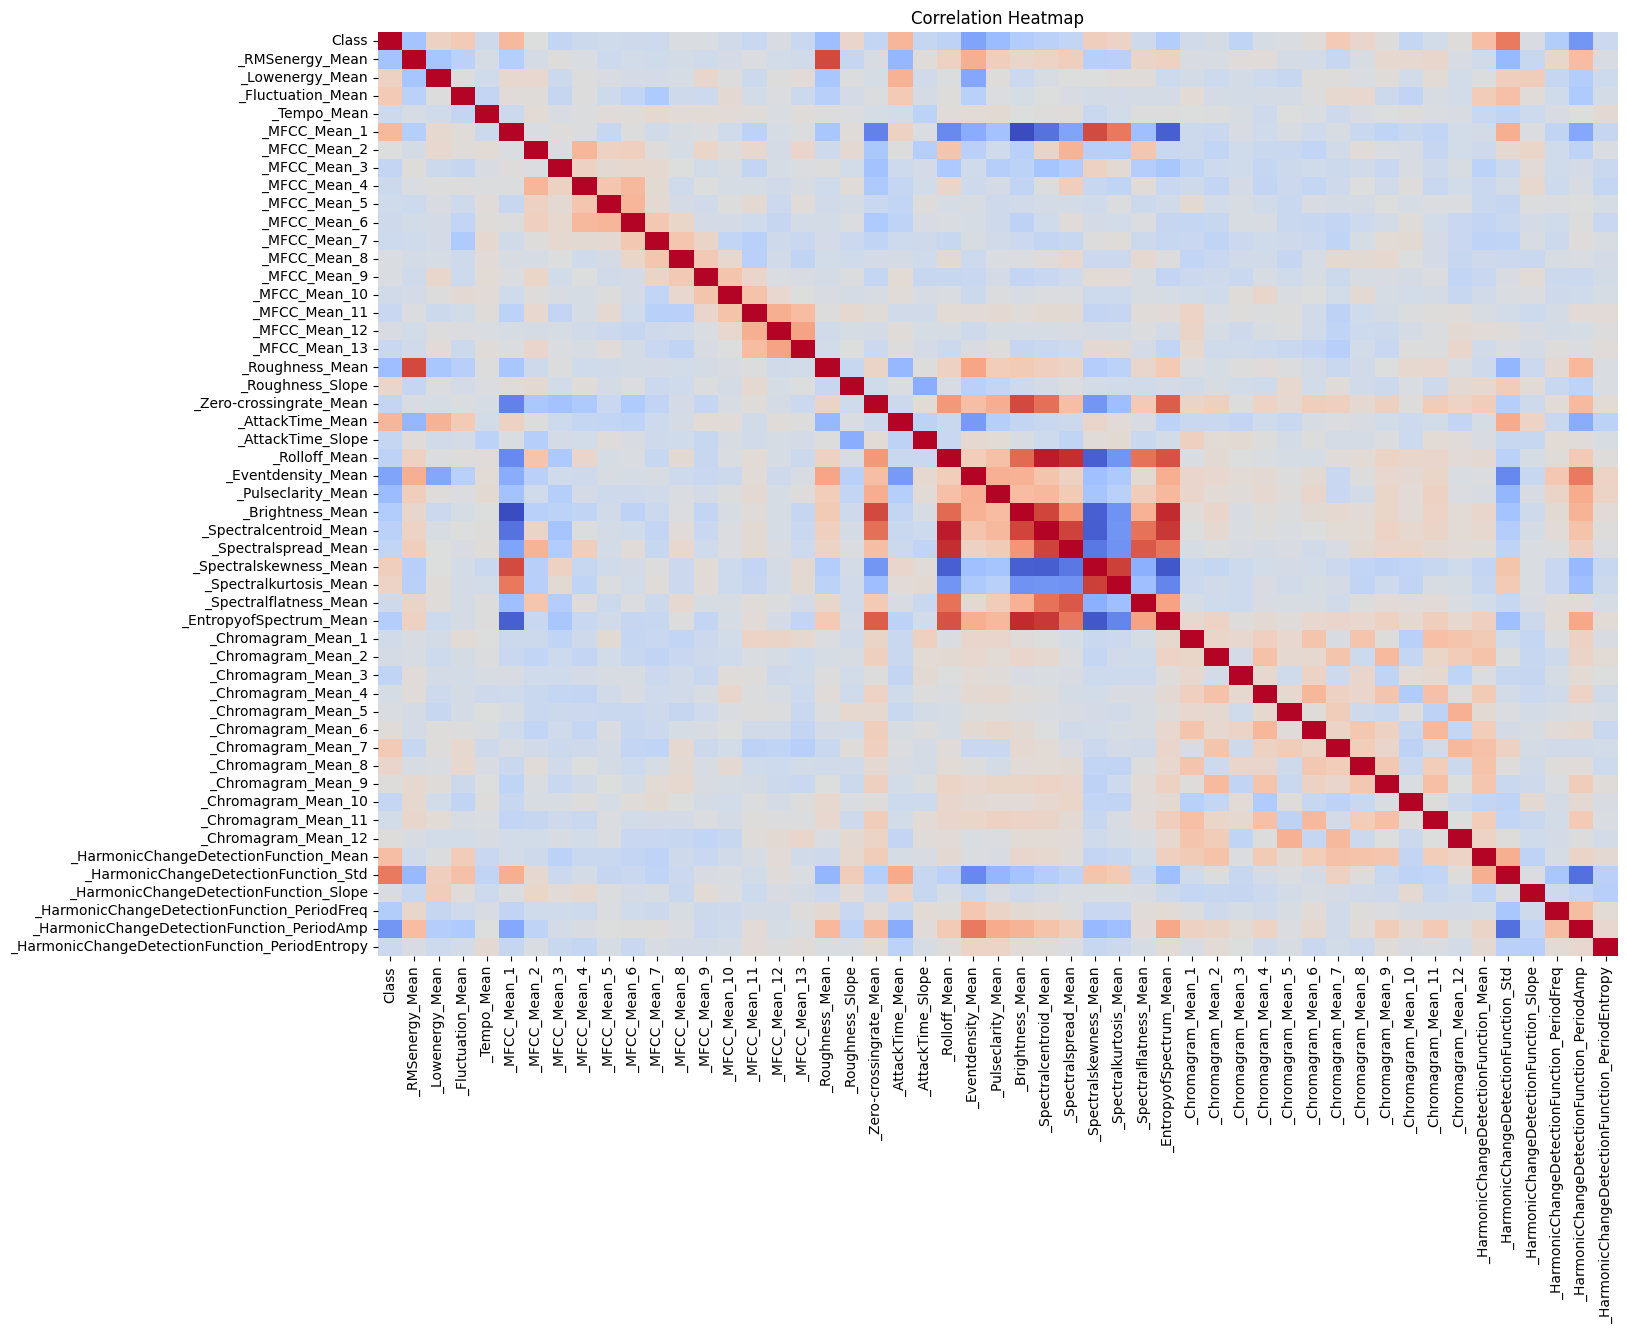

In [11]:
# Graficar Mapa de calor
heatmap = CorrelationHeatmap(encoded_data)  
heatmap.calculate_correlation()   
heatmap.plot_heatmap() 

In [7]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

#------------------------limpieza, depuracion y carga -------------------


#----------------------ingienierica caracteristica------------------------


#------------------------modelado--------------------------------

mlflow.set_tracking_uri("http://24.144.69.175:5000")
mlflow.set_experiment(f"/Mario/test")


with mlflow.start_run() as run:
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 6)
    mlflow.log_param("max_features", 3)

    # Load the diabetes dataset.
    db = load_diabetes()
    X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

    # Create and train models.
    rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
    rf.fit(X_train, y_train)

    # Use the model to make predictions on the test dataset.
    predictions = rf.predict(X_test)
    
    mlflow.log_metric("acc", rf.score(X_test, y_test))

    mlflow.sklearn.log_model(rf, "model")

    print("Run ID: {}".format(run.info.run_id))
    
    
#------------------------revisor-------------------------



2024/10/10 18:09:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/10 18:09:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-ram-932 at: http://24.144.69.175:5000/#/experiments/2/runs/988ff919cf084da487778147e3bc3bb4.
2024/10/10 18:09:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://24.144.69.175:5000/#/experiments/2.


Run ID: 988ff919cf084da487778147e3bc3bb4
